## A1: Data curation

In this notebook, we will retrieve raw traffic data from two different Wikipedia APIs, process this data to create a curated dataset consisting of monthly traffic data for English Wikipedia from December 1 2007 through September 30 2018, then we will analyze this dataset by producing a timeseries visualization.

### Step 1: Data acquisition
In order to measure Wikipedia traffic from 2007-2018, we will need to collect data from two different API endpoints, the Legacy Pagecounts API and the Pageviews API.

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
2. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews documentation), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end )) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.
For each API, we will need to collect data for all months where data is avaiable and then save the raw results into 5 separate JSON source data files (one file per API query type) before continuing to step 2.

In [4]:
import json
import requests

In [5]:
endpoint_pagecounts = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [6]:
# Parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
params_pagecounts = {"project" : "en.wikipedia.org",
                     "granularity" : "monthly",
                     "start" : "2007120100",
                      # for end use 1st day of month following final month of data
                     "end" : "2016080100"
                     }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
params_pageviews = {"project" : "en.wikipedia.org",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : "2018090100"
                    }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/murtazajafferji',
    'From': 'murtaza@uw.edu'
}

Define some helper functions to download JSON from an endpoint.

In [7]:
# Make a call to an endpoint with the specified parameteres
def api_call(endpoint, parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

# Download the json response from an endpoint with specified parameters
def download_json(endpoint, parameters, filename):
    data = api_call(endpoint, parameters)
    with open(filename, 'w') as outfile:
        json.dump(data, outfile)
    return data

We save JSON-formatted source data that contains the complete and un-edited output of the Pageview API queries, filtered by access type. 

In [16]:
# Download the response of each API call to a separate file
pageviews_desktop_filename = 'pageviews_mobile-web_201507-201809.json'
params_pageviews_desktop = dict(params_pageviews, **{'access': 'desktop'})
pageviews_desktop_data = download_json(endpoint_pageviews, params_pageviews_desktop, pageviews_desktop_filename)

pageviews_mobile_web_filename = 'pageviews_mobile-web_201507-201809.json'
params_pageviews_mobile_web = dict(params_pageviews, **{'access': 'mobile-web'})
pageviews_mobile_web_data = download_json(endpoint_pageviews, params_pageviews_mobile_web, pageviews_mobile_web_filename)

pageviews_mobile_app_filename = 'pageviews_mobile-app_201507-201809.json'
params_pageviews_mobile_app = dict(params_pageviews, **{'access': 'mobile-app'})
pageviews_mobile_app_data = download_json(endpoint_pageviews, params_pageviews_mobile_app, pageviews_mobile_app_filename)


Here is a sample of the data that has been exported to json files for the Pageview API queries:

In [15]:
# Print out the structure of the data, but reduce the size of the items to the first 5 records
sample_pageviews_data = pageviews_desktop_data.copy()
sample_pageviews_data['items'] = sample_pageviews_data['items'][:5]
print(sample_pageviews_data)

{'items': [{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015070100', 'views': 4376666686}, {'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015080100', 'views': 4332482183}, {'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015090100', 'views': 4485491704}, {'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015100100', 'views': 4477532755}, {'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015110100', 'views': 4287720220}]}


We save JSON-formatted source data that contains the complete and un-edited output of the Pagecount API queries, filtered by access-site type. 

In [12]:
# Download the response of each API call to a separate file
pagecounts_desktop_site_filename = 'pagecounts_desktop-site_200712-201608.json'
params_pagecounts_desktop_site = dict(params_pagecounts, **{'access-site': 'desktop-site'})
pagecounts_desktop_site_data = download_json(endpoint_pagecounts, params_pagecounts_desktop_site, pagecounts_desktop_site_filename)

pagecounts_mobile_site_filename = 'pagecounts_mobile-site_200712-201608.json'
params_pagecounts_mobile_site = dict(params_pagecounts, **{'access-site': 'mobile-site'})
pagecounts_mobile_site_data = download_json(endpoint_pagecounts, params_pagecounts_mobile_site, pagecounts_mobile_site_filename)

Here is a sample of the data that has been exported to json files for the Pagecount API queries:

In [14]:
# Print out the structure of the data, but reduce the size of the items to the first 5 records
sample_pagecounts_data = pagecounts_desktop_site_data.copy()
sample_pagecounts_data['items'] = sample_pagecounts_data['items'][:5]
print(sample_pagecounts_data)

{'items': [{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2007120100', 'count': 2998331524}, {'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2008010100', 'count': 4930902570}, {'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2008020100', 'count': 4818393763}, {'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2008030100', 'count': 4955405809}, {'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2008040100', 'count': 5159162183}]}


### Step 2: Data processing

We need to perform a series of processing steps on these data files in order to prepare them for analysis. At the end of this step, we will have a single CSV-formatted data file that will be used in our analysis (step 3) with no significant additional processing.

* For data collected from the Pageviews API, combine the monthly values for <tt>mobile-app</tt> and <tt>mobile-web</tt> to create a total mobile traffic count for each month.
* For all data, separate the value of <tt>timestamp</tt> into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour (DDHH).

Our output will be a single CSV file with the following headers:

|Column|Value|
|------|-----|
|year|YYYY|
|month|MM|
|pagecount_all_views|num_views|
|pagecount_desktop_views|num_views|
|pagecount_mobile_views|num_views|
|pageview_all_views|num_views|
|pageview_desktop_views|num_views|
|pageview_mobile_views|num_views|

For all months with 0 pageviews for a given access method (e.g. <tt>desktop-site, mobile-app</tt>), that value for that (column, month) need to be listed as 0. So for example all values of <tt>pagecount_mobile_views</tt> for months before October 2014 will be 0, because mobile traffic data is not available before that month.

Define some helper functions to combine the previous datasets into one dataset.

In [18]:
from datetime import datetime
from dateutil.rrule import rrule, MONTHLY

def init_dict(count_dict, start_date, end_date, keys):
    # Generate a list of months between the start date and tne end date
    dates = [dt for dt in rrule(MONTHLY, dtstart=start_date, until=end_date)]
    for datetime_object in dates:
        date_string = datetime_object.strftime('%Y%m%d%H')
        count_dict[date_string] = {}
        # Add data needed for year column
        count_dict[date_string]['year'] = datetime_object.strftime('%Y')
        # Add data needed for month column
        count_dict[date_string]['month'] = datetime_object.strftime('%m')
        # Initialize to 0
        for key in keys:
            count_dict[date_string][key] = 0
            
# Add the values to the count_dict for the specified keys
def add_values_to_count_dict(count_dict, data, count_key, all_count_key, view_key):
    for item in data['items']: 
        count_dict[item['timestamp']][all_count_key] += item[view_key]
        count_dict[item['timestamp']][count_key] += item[view_key]


Combine the 5 datasets from the separate API queries into a single dictionary.

In [21]:
pageviews_by_month = {}
init_dict(pageviews_by_month, datetime(2007,12,1), datetime(2018,9,1), ['pageview_all_views', 'pageview_mobile_views', 'pageview_desktop_views', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views'])
add_values_to_count_dict(pageviews_by_month, pageviews_mobile_web_data, 'pageview_mobile_views', 'pageview_all_views', 'views')
add_values_to_count_dict(pageviews_by_month, pageviews_mobile_app_data, 'pageview_mobile_views', 'pageview_all_views', 'views')
add_values_to_count_dict(pageviews_by_month, pageviews_desktop_data, 'pageview_desktop_views', 'pageview_all_views', 'views')
add_values_to_count_dict(pageviews_by_month, pagecounts_mobile_site_data, 'pagecount_mobile_views', 'pagecount_all_views', 'count')
add_values_to_count_dict(pageviews_by_month, pagecounts_desktop_site_data, 'pagecount_desktop_views', 'pagecount_all_views', 'count')

Sort the combined data by date and save the output to a csv file that will be used for analysis.

In [22]:
import csv

output_data = [pageviews_by_month[key] for key in sorted(pageviews_by_month.keys())]

with open('en-wikipedia_traffic_200712-201809.csv', 'w', newline='') as outfile:
    keys = output_data[0].keys()
    dict_writer = csv.DictWriter(outfile, keys)
    dict_writer.writeheader()
    dict_writer.writerows(output_data)

### Step 3: Analysis
We now visualize the combined dataset as a time series graph using Pandas and Matplotlib.


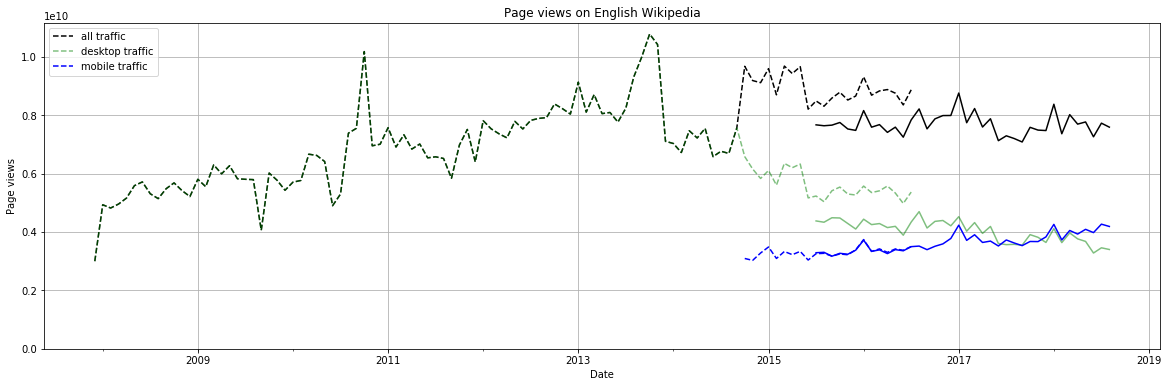

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pylab as plt
import pandas as pd

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(output_data)

# Replace the 0 values witb NaN in order to produce a visualization that more accurately represents the data
df = df.replace(0, float('NaN'))

# Convert the year and month columns into a datetime value and set the date as the index
df['date'] = pd.to_datetime((df.year + df.month).apply(str),format='%Y%m')
df.set_index('date', inplace=True)

# Set the colors of the lines with varying opacity so that overlapped lines are still visible.
df.plot(color=[[0,0,0],[0,  .5, 0,  0.5], [0, 0, 1,  1]], style=['--','--','--','-','-','-'], figsize=(20, 6))

# Set the text of the legend. We have 6 separate lines, but since we only have three separate colors, we will only include 3 values in the legend
plt.legend(['all traffic', 'desktop traffic', 'mobile traffic'], loc='upper left')
plt.grid()

# Set the y-min to 0
plt.ylim(ymin=0)

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Page views')
plt.title('Page views on English Wikipedia')

# Generate an image file
fig = plt.figure()
fig.savefig("en-wikipedia_traffic_200712-201809.png")